In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
dataset = pd.read_csv('/content/sample_data/final_dataset_tillmarch.csv')

In [ ]:
dataset.head(1)

Business_Date   Volume  ...  Adj Close_currency  Sentiment_Score
0    01-08-2018  6871812  ...           68.307098         0.101237

[1 rows x 12 columns]

In [ ]:
dataset[-1:].isnull().sum()

Business_Date          0
Volume                 0
Adj Close              0
Change_AdjPrice        0
Adj Close_nifty        0
Adj Close_banknifty    0
inflation              0
moneysupply            0
interestrate           0
Adj Close_gold         0
Adj Close_currency     0
Sentiment_Score        0
dtype: int64

In [ ]:
dataset = dataset.iloc[:-1]

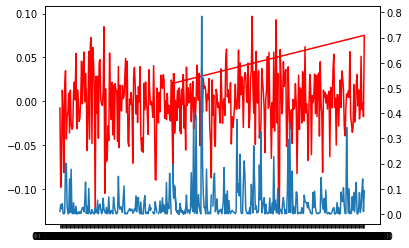

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(dataset["Business_Date"],dataset["Adj Close"])
#plt.plot(dataset["Business_Date"],dataset["Sentiment_Score"])
Figure,Axis1=plt.subplots()
Axis1.plot(dataset["Business_Date"],np.log((dataset["Adj Close"]/(dataset["Adj Close"].shift(-1)))**2),color="red")
Axis2=Axis1.twinx()
Axis2.plot(dataset["Business_Date"],(dataset["Sentiment_Score"])**2)
plt.show()

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


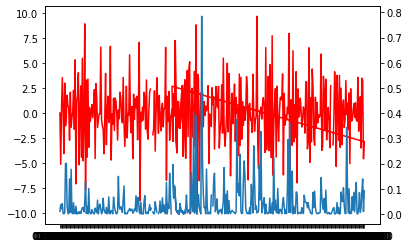

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(dataset["Business_Date"],dataset["Adj Close"])
#plt.plot(dataset["Business_Date"],dataset["Sentiment_Score"])
Figure,Axis1=plt.subplots()
Axis1.plot(dataset["Business_Date"],np.log((dataset["Change_AdjPrice"]/(dataset["Change_AdjPrice"].shift(-1)))**2),color="red")
Axis2=Axis1.twinx()
Axis2.plot(dataset["Business_Date"],(dataset["Sentiment_Score"])**2)
plt.show()

In [ ]:
#dataset["sk"]=np.log(dataset["Adj Close"]/(dataset["Adj Close"].shift(-1)))

In [ ]:
dataset["sk"]=np.log((dataset["Change_AdjPrice"]/dataset["Change_AdjPrice"].shift(-1)))**2

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:679: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
dataset["Corr_sq"]=(dataset["Sentiment_Score"])**2

In [ ]:
dataset.corr()

Volume  Adj Close  ...        sk   Corr_sq
Volume               1.000000  -0.214904  ... -0.070620 -0.087203
Adj Close           -0.214904   1.000000  ...  0.015527  0.117442
Change_AdjPrice      0.164606   0.056588  ... -0.024266  0.002055
Adj Close_nifty     -0.181579   0.739200  ...  0.005244  0.075589
Adj Close_banknifty -0.213037   0.847983  ... -0.012995  0.078445
inflation           -0.082481   0.071584  ... -0.052171 -0.008447
moneysupply         -0.069891   0.345610  ...  0.001892  0.059138
interestrate         0.113878  -0.516910  ... -0.031734 -0.088872
Adj Close_gold      -0.080543   0.340912  ... -0.012115  0.036904
Adj Close_currency   0.118246  -0.556171  ...  0.057508 -0.129643
Sentiment_Score     -0.044546   0.028684  ...  0.156681  0.418609
sk                  -0.070620   0.015527  ...  1.000000  0.128469
Corr_sq             -0.087203   0.117442  ...  0.128469  1.000000

[13 rows x 13 columns]

In [ ]:
from sklearn import preprocessing
# Get column names first
names = dataset.columns

In [ ]:
dataset['Sentiment_Score'].fillna(0,inplace=True)

In [ ]:
# Create the Scaler object
scaler = preprocessing.StandardScaler()

In [ ]:
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(dataset.iloc[:,1:])

In [ ]:
scaled_df = pd.DataFrame(scaled_df)

In [ ]:
scaled_df

0         1         2  ...         7         8         9
0   -0.566240 -2.307241 -0.037596  ... -1.309973 -2.046672  0.105433
1   -0.629918 -2.275149 -0.222320  ... -1.340848 -1.807104  0.580827
2    0.971959 -1.854888 -0.011026  ... -1.379726 -1.807104  0.323117
3    2.102590 -1.517916  0.036838  ... -1.350649 -1.656019 -1.513873
4    1.051744 -1.575224  0.041116  ... -1.365515 -1.822252 -0.223408
..        ...       ...       ...  ...       ...       ...       ...
376 -0.454864  0.750335  1.299422  ...  2.020892  0.687985  0.387125
377 -0.614124  0.461908  0.841799  ...  2.620089  0.734052  1.165055
378 -0.812200  0.512402  0.784471  ...  2.301541  0.858260 -2.419850
379 -0.521329  0.522348  0.567169  ...  2.340584  0.721001  0.080996
380 -0.228261  0.621040  0.484908  ...  2.286022  0.560511  1.182658

[381 rows x 10 columns]

In [ ]:
scaled_df.corr()

0         1         2  ...         7         8         9
0  1.000000 -0.216400 -0.178046  ... -0.084578  0.113858 -0.052107
1 -0.216400  1.000000  0.752716  ...  0.368470 -0.544527  0.028360
2 -0.178046  0.752716  1.000000  ...  0.500706 -0.389680 -0.008017
3 -0.209415  0.858971  0.938701  ...  0.546388 -0.482759 -0.024157
4 -0.082539  0.100691  0.582841  ...  0.627592  0.204850 -0.060379
5 -0.078394  0.328901  0.063086  ... -0.141851 -0.358116  0.054010
6  0.116108 -0.547652 -0.676088  ... -0.929963  0.025003  0.056233
7 -0.084578  0.368470  0.500706  ...  1.000000  0.168381 -0.062518
8  0.113858 -0.544527 -0.389680  ...  0.168381  1.000000 -0.049448
9 -0.052107  0.028360 -0.008017  ... -0.062518 -0.049448  1.000000

[10 rows x 10 columns]